# Optimization & Training (Beginner)

- tf와 layers 패키지 불러오기

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

## 학습 과정 돌아보기

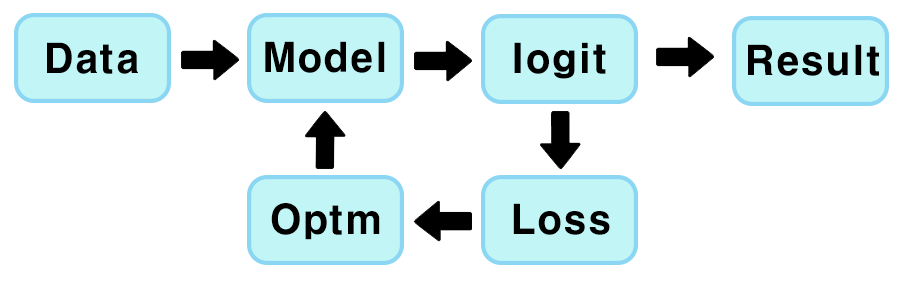

# Prepare MNIST Datset

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

## Build Model

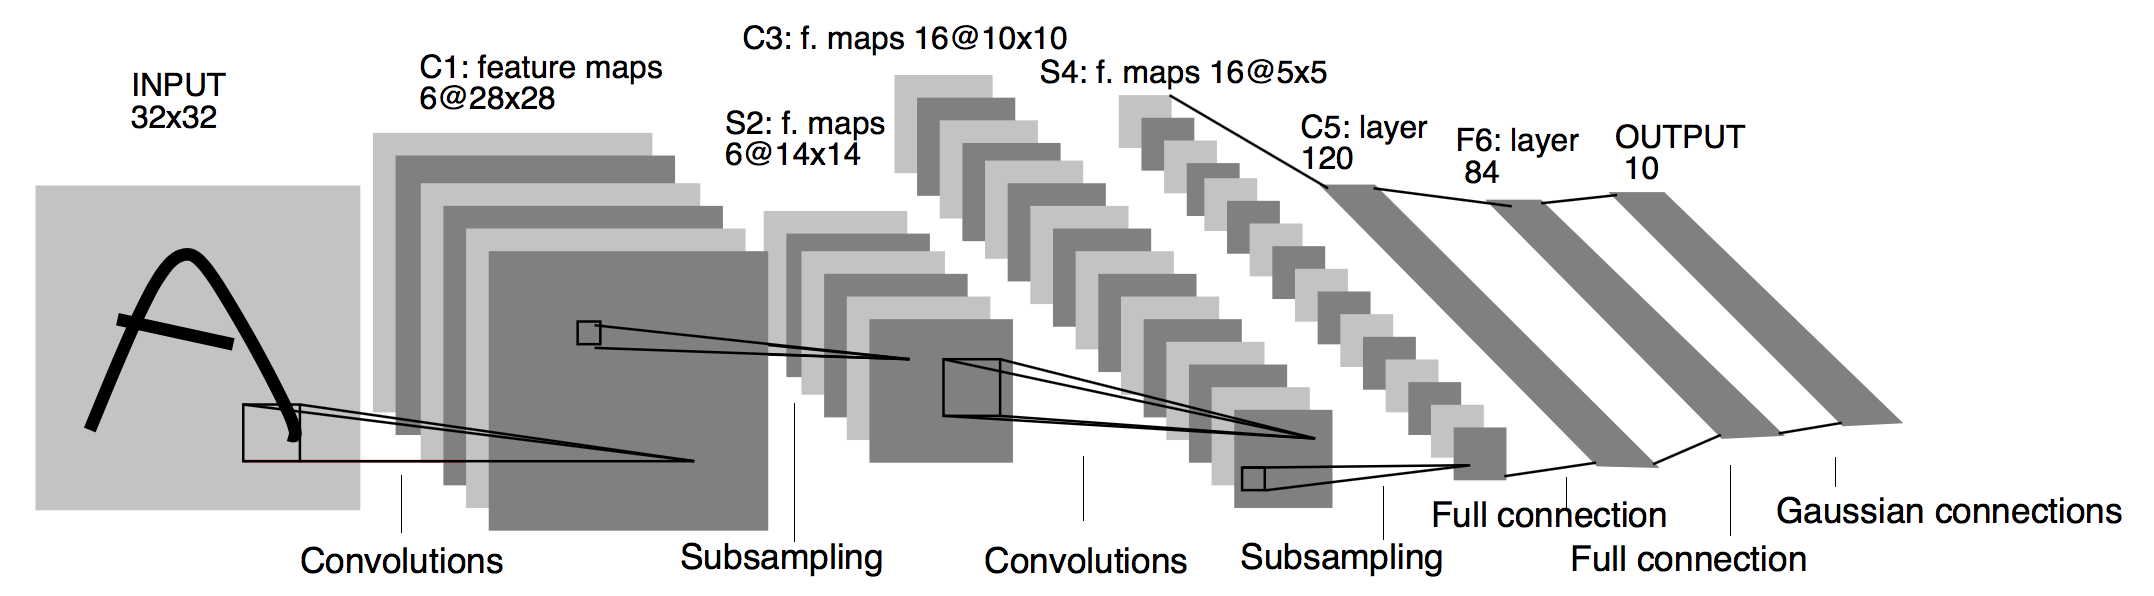

In [3]:
inputs = layers.Input((28, 28, 1))

net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

# Optimization  
모델을 학습하기 전 설정 

- Loss Function  
- Optimization  
- Metrics

# (1) Loss Function  
Loss Function 방법 확인

#### Categorical vs Binary

- tf.keras.losses.sparse_categorical_crossentropy
- tf.keras.losses.categorical_crossentropy
- tf.keras.losses.binary_crossentropy

In [4]:
loss_fun = tf.keras.losses.sparse_categorical_crossentropy

# (2) Metrics  

모델을 평가하는 방법

tf.keras.metrics.

In [5]:
# 둘 다 가능!
metrics = ['accuracy']
metrics = [tf.keras.metrics.Accuracy()]

## Compile  
Optimizer 적용

- tf.keras.optimizers.SGD()  
- tf.keras.optimizers.RMSprop()    
- tf.keras.optimizers.Adam()  

In [6]:
optm = tf.keras.optimizers.Adam()

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.Accuracy()])

# Prepare Dataset  
학습에 사용할 데이터셋 준비

shape 확인

In [7]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [8]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

차원 수 늘리기

In [9]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

차원 수 잘 늘었는지 확인

In [10]:
train_x.shape

(60000, 28, 28, 1)

Rescaling

In [11]:
np.min(train_x), np.max(train_x)

(0, 255)

In [12]:
train_x = train_x / 255.
test_x = test_x / 255.

In [13]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

# Training  
본격적으로 학습 들어가기

학습용 Hyperparameter 설정

- num_epochs
- batch_size

In [14]:
num_epochs = 1
batch_size = 32

- model.fit

In [28]:
model.fit(train_x, train_y, 
          batch_size=batch_size, 
          shuffle=True, 
          epochs=num_epochs) 

W0815 16:26:08.586572 17120 deprecation.py:323] From C:\Users\June\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.1456 - accuracy: 7.0000e-05


# Check History  
학습 과정(History) 결과 확인

In [29]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True, 
                 epochs=num_epochs) 

Train on 60000 samples
60000/60000 [==============================] - 150s 3ms/sample - loss: 0.0581 - accuracy: 4.5833e-04 - loss: 0.0582 - accu
